In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
table = pd.read_csv('dataset3.txt',delimiter='\t')

In [3]:
a = range(0,11,1)

In [4]:
table.columns =a

In [5]:
table.head()

,0,1,2,3,4,5,6,7,8,9,10
0,240.25,16.81,41.0,17.07,155.0,170.0,51.0,162.71,165.05,160.38,F
1,249.64,17.64,42.0,16.82,158.0,176.0,60.0,160.30,161.27,168.75,F
2,265.69,30.25,55.0,20.70,163.0,172.0,64.0,184.24,169.06,173.31,F
3,252.81,21.16,46.0,18.20,159.0,160.0,72.0,182.67,174.44,153.37,F
4,289.00,25.00,50.0,17.30,170.0,167.0,70.0,198.68,170.79,176.13,F


In [6]:
data = np.array(table)[:,:-1]

In [7]:
pca = PCA(n_components=None, copy=True, whiten=False)  

In [8]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
variance_ratio = pca.explained_variance_ratio_ 
pca.explained_variance_ratio_

array([  6.11595774e-01,   1.39157987e-01,   7.37764364e-02,
         6.89892346e-02,   5.25709358e-02,   3.87759021e-02,
         1.41219416e-02,   9.73404509e-04,   2.59513548e-05,
         1.24327926e-05])

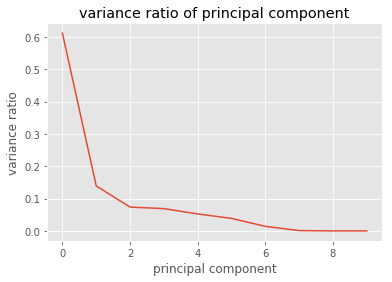

In [10]:
#每个主成分的方差占总体方差的比例
plt.style.use('ggplot')
plt.plot(variance_ratio)
plt.title('variance ratio of principal component')
plt.xlabel('principal component')
plt.ylabel('variance ratio')
plt.show()

In [11]:
#求ratio的累积分布
def cumulative_ratio(data):
    data_new = np.ndarray([10,])
    for i in range(10):
        data_new[i] = data[i] +np.sum(data[:i])
    return data_new

In [12]:
variance_ratio_cumul = cumulative_ratio(variance_ratio)

In [13]:
variance_ratio_cumul

array([ 0.61159577,  0.75075376,  0.8245302 ,  0.89351943,  0.94609037,
        0.98486627,  0.99898821,  0.99996162,  0.99998757,  1.        ])

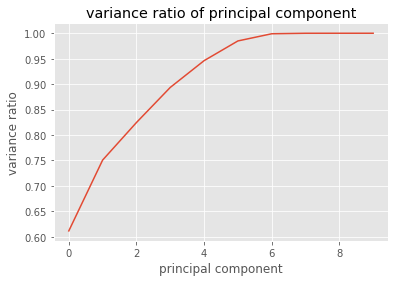

In [14]:
#每个主成分的方差占总体方差的比例
plt.style.use('ggplot')
plt.plot(variance_ratio_cumul)
plt.title('variance ratio of principal component')
plt.xlabel('principal component')
plt.ylabel('variance ratio')
plt.show()

In [15]:
pca = PCA(n_components=3, copy=True, whiten=False)  

In [16]:
transformed_data = pca.fit_transform(data)
transformed_data.shape

(953, 3)

In [17]:
pca.explained_variance_ratio_

array([ 0.61159577,  0.13915799,  0.07377644])

#pick the first three components
'''
分别用原始的十维特征和PCA 选出的主成分做分级聚类，考查采用
不同特征、不同距离度量选项对结果的影响，讨论将数据聚为几类更合
理。将聚类结果以适当的方式显示出来，对聚类结果进行分析和讨论
'''

In [18]:
transformed_data.shape

(953, 3)

In [19]:
from sklearn.cluster import AgglomerativeClustering as hc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [50]:
true_label_ = np.concatenate((np.repeat(0,468),np.repeat(1,953-468)))

In [78]:
def ACC(label):
    true_label = np.copy(true_label_)
    if np.sum(label_pca[:468])/np.sum(label_pca[468:]) >1: 
        true_label = - true_label +1  
    else:
        true_label = true_label
    whole = 1- np.abs(np.sum(label-true_label))/953.0
    female = 1- np.abs(np.sum(label[:468]-true_label[:468]))/468.
    male =1- np.abs(np.sum(label[468:]-true_label[468:]))/(953.-468.)
    return whole,female,male
def cluster_result(affinity,linkage):
    hcluster_1 = hc(affinity=affinity,linkage=linkage)
    hcluster_2 = hc(affinity=affinity,linkage=linkage)
    label_pca = hcluster_1.fit_predict(transformed_data)
    label_origin = hcluster_2.fit_predict(data)
    pca_acc,pca_acc_f,pca_acc_m = ACC(label_pca)
    ori_acc,ori_acc_f,ori_acc_m = ACC(label_origin)
    return np.array([ori_acc,ori_acc_f,ori_acc_m,pca_acc,pca_acc_f,pca_acc_m])

In [79]:
affinity = np.array(['euclidean', 'l1', 'l2','manhattan', 'cosine'])
linkage = np.array(['ward','complete','average'])

In [80]:
acc_result = np.zeros([11,6])
acc_result[0] = cluster_result(affinity[0],linkage[0])
for i in range(2):
    for j in range(5):
        acc_result[5*i+j+1]= cluster_result(affinity[j],linkage[i+1])    

In [81]:
import matplotlib.pyplot as plt

In [98]:
table = pd.DataFrame(acc_result)
table.columns= ['ori_W','ori_F','ori_M','pca_W','pca_F','pca_M']
list = ['ward_euclidean']
for i in range(2):
    for j in range(5):
        list.append(linkage[i+1]+'_'+affinity[j])
table.index = list

In [99]:
table

,ori_W,ori_F,ori_M,pca_W,pca_F,pca_M
ward_euclidean,0.879328,0.955128,0.719588,0.799580,0.967949,0.575258
complete_euclidean,0.497377,1.000000,0.012371,0.497377,1.000000,0.012371
complete_l1,0.492130,1.000000,0.002062,0.497377,1.000000,0.012371
complete_l2,0.497377,1.000000,0.012371,0.497377,1.000000,0.012371
complete_manhattan,0.492130,1.000000,0.002062,0.497377,1.000000,0.012371
complete_cosine,0.498426,1.000000,0.014433,0.946485,0.897436,0.795876
average_euclidean,0.492130,1.000000,0.002062,0.515215,0.000000,0.987629
average_l1,0.516264,0.000000,0.985567,0.492130,1.000000,0.002062
average_l2,0.492130,1.000000,0.002062,0.515215,0.000000,0.987629
average_manhattan,0.516264,0.000000,0.985567,0.492130,1.000000,0.002062


最好的结果是euc加上ward 以及cosine complete

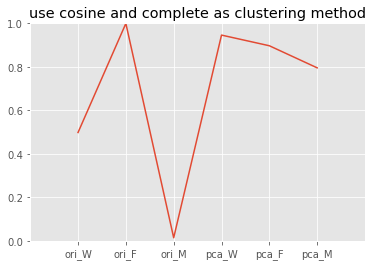

In [101]:
x = [1,2,3,4,5,6]
plt.plot(x,acc_result[5])
plt.ylim(0,1)
plt.xlim(0,7)
labels = ['ori_W','ori_F','ori_M','pca_W','pca_F','pca_M']
plt.xticks(x, labels)
plt.title('use cosine and complete as clustering method')
plt.show()

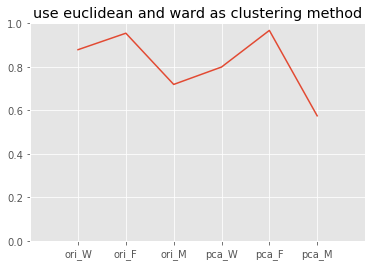

In [87]:
x = [1,2,3,4,5,6]
plt.plot(x,acc_result[0])
plt.ylim(0,1)
plt.xlim(0,7)
labels = ['ori_W','ori_F','ori_M','pca_W','pca_F','pca_M']
plt.xticks(x, labels)
plt.title('use euclidean and ward as clustering method')
plt.show()

比较聚类准确率？ 前468是Female
总准确率  女生中预测错的  男生中预测错的

print 'use PCA components as features to calculate whole accruracy: %s' %pca_acc 
print 'use PCA components as features to calculate female accruracy: %s' %pca_acc_f
print 'use PCA components as features to calculate male accruracy: %s' %pca_acc_m 
print 'use all features to calculate whole accruracy: %s' %ori_acc 
print 'use all features to calculate female accruracy: %s' %ori_acc_f
print 'use all features to calculate male accruracy: %s' %ori_acc_m 

画图效果很不好看，存储数据用R画图

可以指定不同的距离方式以及其他参数